In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Consider the following differential equation

$$\dfrac{\mathrm{d}x(t)}{\mathrm{d}t}=\alpha x(t)$$

for $\alpha=0.6$. 

1. Is the system autonomous or not? Why?


2. Consider the initial condition $x(0)=1$ and simulate the dynamical system through Euler's, Midpoint and Runge Kutta 2 methods with the same discretisation step $\mathrm{d}t=0.1$. 


3. Plot the three solutions on the same graph and compare them with the analytical solution.


4. Try different values of $\mathrm{d}t$ for Euler's method only. Find the value of $\mathrm{d}t$ for which Euler's solution is similar to Runge Kutta 2 solution (simulated with the previous value of $\mathrm{d}t=0,1$). Explain your result by considering the errors of the two methods.  


5. Why do RungeKutta 2 and the Midpoint methods behave in the same way in this case?



Response to point 1:

The system is autonomous because the function $f(x(t),t)$ has no term that depends explicitly on t. Indeed, $f(x(t),t)=\alpha x(t)$, and the dependence on t is only implicit in x(t).



In the following cell, I define a class to simulate different numerical methods for a 1-dimensional system (we will see higher dimensions in the next lecture).
The class receives as input the function f that appears in the differential equation considered, $\dfrac{\mathrm{d}x}{\mathrm{d}t}=f$. The function $f$ needs to receive as input the value of $x$ and the value of $t$ (even if the system is autonomous and the function has no explicit dependence on t). For instance, see how I defined the function in the cell after the next one.

* The method Initialise set the initial condition (the starting values of x and t) from which we want to simulate.


- The method Euler performs Euler's method. 

- The method MidPoint performs the Midpoint method.

- The method RungeKutta2 performs RungeKutta 2.

All these last three methods receive as input the value of $\mathrm{d}t$ adopted and the number of iterations considered.
The output of all these methods are: X. the dynamic of the system across time; T, the values of time used in the simulation.


In [2]:
class Numerical_methods:
    
    def __init__(self,f):  
        
        self.f=f
        self.x=[]
        self.t=[]
    
    def Initialise(self,x_start,t_start):
        
        self.x=x_start
        self.t=t_start
        
        
    def Euler(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
        
            self.x=self.x+dt*f(self.x,self.t)
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def MidPoint(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            x_mp=self.x+dt/2*f(self.x,self.t)
            self.x=self.x+dt*f(x_mp,self.t+dt/2)
            
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T
    
    def RungeKutta2(self,dt,N_iter):
        
        X=np.zeros([N_iter])
        T=np.zeros([N_iter])
        
        X[0]=np.copy(self.x)
        T[0]=np.copy(self.t)
        
        for n in range(1,N_iter):
            
            k1=f(self.x,self.t)
            k2=f(self.x+dt*k1,self.t+dt)    
                        
            self.x=self.x+dt*(k1+k2)/2
            
            X[n]=np.copy(self.x)
            
            self.t=self.t+dt
            T[n]=np.copy(self.t)
            
        return X, T

                

In [3]:
## Point 2. 

def f(x,t):     ## Definition of the function. t needs to be an input even if the function does not use it, as in this case.
                ## This formulation permits us to be general and to apply the same code to non autonomous systems.
    
    alpha=1.1   
    y=alpha*x
    
    return y


NM=Numerical_methods(f)    ## Object definition

##Initial conditions
x_start=1     
t_start=0.


NM.Initialise(x_start,t_start)     ## Setting the initial conditions in the object

dt=0.1                             ## Value of dt
N_iter=int(10/dt)                  ## Number of iteration. We define the numbger of iteration as a function of dt so that we  
                                   ## easily change dt and simulate the system for the same time. Imagine, if we use 
                                   ## N_iter=100 with dt=0.1 s  we are simulating the systems for 10 seconds, while if we
                                   ## N_iter=100 with dt=0.01 we are simulating the system for 1 second. To avoid this, we 
                                   ## define first the number of steps in a unit like seconds, and then we divide by the dt used.
    
    
X_euler,ts=NM.Euler(dt,N_iter)     ## Perform Euler 

NM.Initialise(x_start,t_start)     ## We need to reset the inital conditions before computing another simulation
X_mp,ts=NM.MidPoint(dt,N_iter)  ## Perform Midpoint method


NM.Initialise(x_start,t_start)              ## Initial condition again
X_RungeKutta2,ts=NM.RungeKutta2(dt,N_iter)  ## Perform Runge Kutta 2




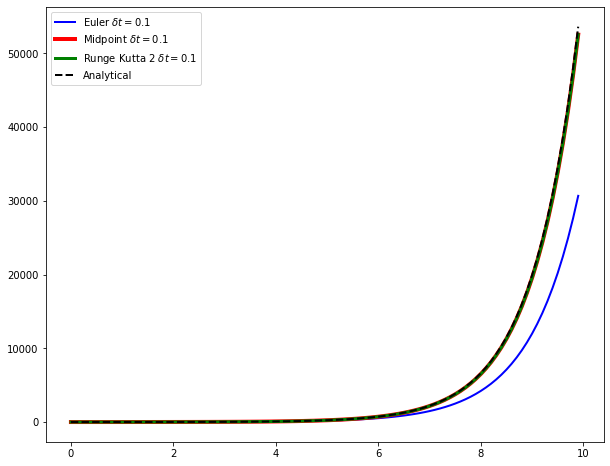

In [4]:
## Plot the results, Response to point 3.

fig, ax = plt.subplots(figsize=(10, 8))

p1,=plt.plot(ts,X_euler,color='b',lw=2)

p2,=plt.plot(ts,X_mp,color='red',lw=4)

p3,=plt.plot(ts,X_RungeKutta2,color='green',lw=3)

p4,=plt.plot(ts,np.exp(1.1*ts)*x_start,'--',color='black',lw=2)

plt.legend([p1,p2,p3,p4],['Euler $\delta t=0.1$','Midpoint $\delta t=0.1$','Runge Kutta 2 $\delta t=0.1$','Analytical'])


In [5]:
## Response to point 4

NM=Numerical_methods(f)

x_start=1
t_start=0.

NM.Initialise(x_start,t_start)

dt=0.05
N_iter=int(10/dt)

X_euler1,ts1=NM.Euler(dt,N_iter)  ## Simulation with Euler with dt=0.05


NM.Initialise(x_start,t_start)

dt=0.02
N_iter=int(10/dt)                 

X_euler2,ts2=NM.Euler(dt,N_iter)  ## Simulation with Euler with dt=0.02

NM.Initialise(x_start,t_start)

dt=0.001
N_iter=int(10/dt)                 

X_euler3,ts3=NM.Euler(dt,N_iter)  ## Simulation with Euler with dt=0.001




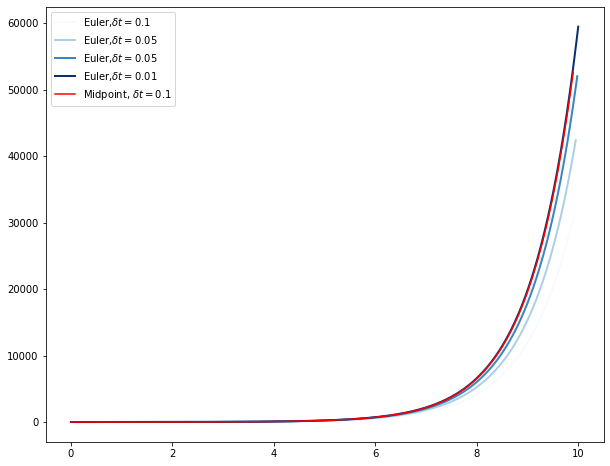

In [6]:
## Plot of the results

fig, ax = plt.subplots(figsize=(10, 8))

ColorSet=cm.Blues(np.linspace(0,1,4))

p1,=ax.plot(ts,X_euler,color=ColorSet[0,:],lw=2)

p2,=ax.plot(ts1,X_euler1,color=ColorSet[1,:],lw=2)

p3,=ax.plot(ts2,X_euler2,color=ColorSet[2,:],lw=2)

p4,=ax.plot(ts3,X_euler3,color=ColorSet[3,:],lw=2)

p5,=ax.plot(ts,X_mp,color='red')

ax.legend([p1,p2,p3,p4,p5],['Euler,$\delta t=0.1$','Euler,$\delta t=0.05$','Euler,$\delta t=0.05$','Euler,$\delta t=0.01$','Midpoint, $\delta t=0.1$'])


As you can see from the plot above, Euler's with a $dt=0.001$ and the Midpoint method with $dt=0.1$ behave similarly. 
The reason is that the global error for Euler's is of the order of $dt$, while the global error for the Midpoint is of the order $dt^2$. Substituting the corresponding values of dt adopted for the two cases, the global errors for the two methods are the same. Note that this is not exactly true in general, but it gives us the order of magnitude of the errors and can be used as a qualitative rule.

Response to point 5.

As we have seen in the lecture through the explicit forms of Runge Kutta 2 and Midpoint for $\dfrac{dx}{dt}=\alpha x$, the 
solutions using the two methods are the same. 


Consider the following system

$$\dfrac{\mathrm{d}x(t)}{\mathrm{d}t}=-\alpha x(t)+\dfrac{10\cos(5t)}{e^{t}}$$

for $\alpha=0.5$. 

1. Is the system autonomous or not? Why?


2. Consider the initial condition $x(0)=2$ and simulate the dynamical system through Euler's, Midpoint and Runge Kutta 2 methods with the same discretisation step $\mathrm{d}t=0.1$. 


3. Difficult question (if you like math): Why are Midpoint and Runge-Kutta dissimilar in this case?
   The solution to this question is not given, try to think about it and if you want, tell me your view...


Response to point 1. 

The system is not autonomous, since there is a term that depends explicitly on $t$. This term is $\dfrac{10\cos(5t)}{e^{t}}$.

In [7]:
## Definition of the function

def f(x,t):
    
    alpha=0.5
    y=-alpha*x+10*np.cos(20*t)*np.exp(-t)
    return y


In [8]:
## Response to point 2

## We proceed as above, simulating the different methods

NM=Numerical_methods(f)

x_start=2
t_start=0.
NM.Initialise(x_start,t_start)

dt=0.1
N_iter=int(10/dt)
X_euler,ts=NM.Euler(dt,N_iter)


NM.Initialise(x_start,t_start)
X_mp,ts=NM.MidPoint(dt,N_iter)


NM.Initialise(x_start,t_start)
X_RungeKutta2,ts=NM.RungeKutta2(dt,N_iter)


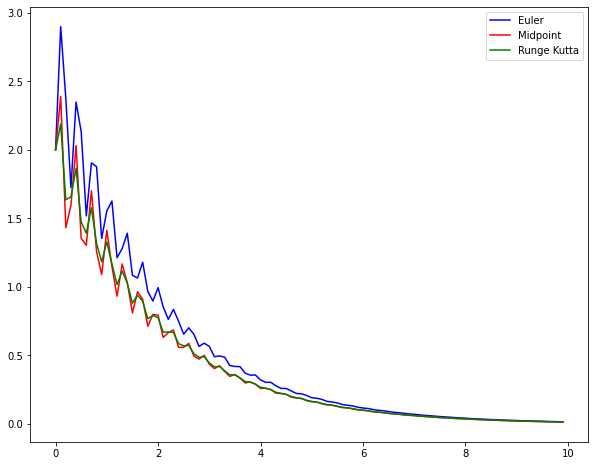

In [9]:
## Plot of the solutions

fig, ax = plt.subplots(figsize=(10, 8))

p1,=plt.plot(ts,X_euler,color='blue')

p2,=plt.plot(ts,X_mp,color='red')

p3,=plt.plot(ts,X_RungeKutta2,color='green')

plt.legend([p1,p2,p3],['Euler','Midpoint', 'Runge Kutta'])
